In [9]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle
#import pdb

In [10]:
dataset_dir = '../dataset_h5/'
skipped_indices = []
filename = 'images_224_delta_1.5.h5'
test_filename = 'images_224.h5'


ava_path = "../dataset/AVA/data/"
ava_data_path = os.path.join(os.getcwd(), ava_path)

In [11]:
import numpy as np
import h5py
import os
import cv2
from sklearn.decomposition import PCA
import ggmm.gpu as ggmm

from sklearn import svm
from sklearn.metrics import accuracy_score


import pandas as pd
from pandas import HDFStore, DataFrame
import pickle

from image_fisher_vector import ImageFisherVector as ifv

store = HDFStore('../dataset_h5/full_test_labels.h5')

labels_test = store['full_labels_test']

### Top 5 HIghest And Lowest Quality Images predicted by SIFT + Fisher Vector

In [25]:
top_confidence_good = labels_test.ix[labels_test.good == 1 ].sort_values(by='confidence', ascending=False)[:5]
top_confidence_bad = labels_test.ix[labels_test.good == 0 ].sort_values(by='confidence', ascending=False)[:5]

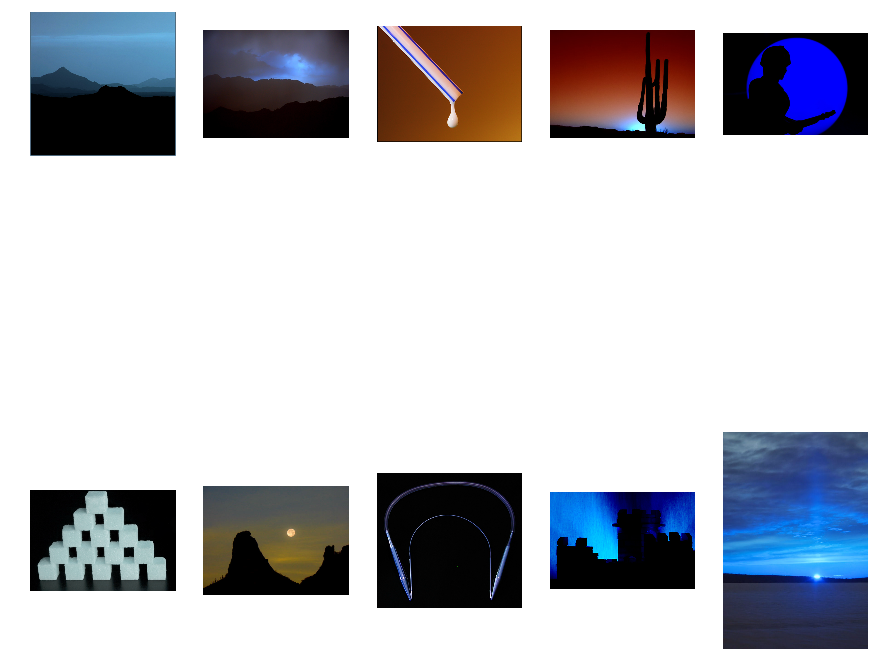

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5, figsize=(15,15))
i=0
for index, row in top_confidence_good.iterrows():
    filename = "{0}.jpg".format(index)
    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    ax[0][i].imshow(image)
    ax[0][i].axis('off')
    i = i + 1
i=0
for index, row in top_confidence_bad.iterrows():
    filename = "{0}.jpg".format(index)
    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    ax[1][i].imshow(image)
    ax[1][i].axis('off')
    i = i + 1

### Top 5 HIghest And Lowest Quality Images predicted by Finetuned VGG Network

In [24]:
vgg_output = store['outputVgg']
top_vgg_good = vgg_output.sort_values(by='vggscore', ascending=False)[:5]
top_vgg_bad = vgg_output.sort_values(by='vggscore', ascending=True)[:5]

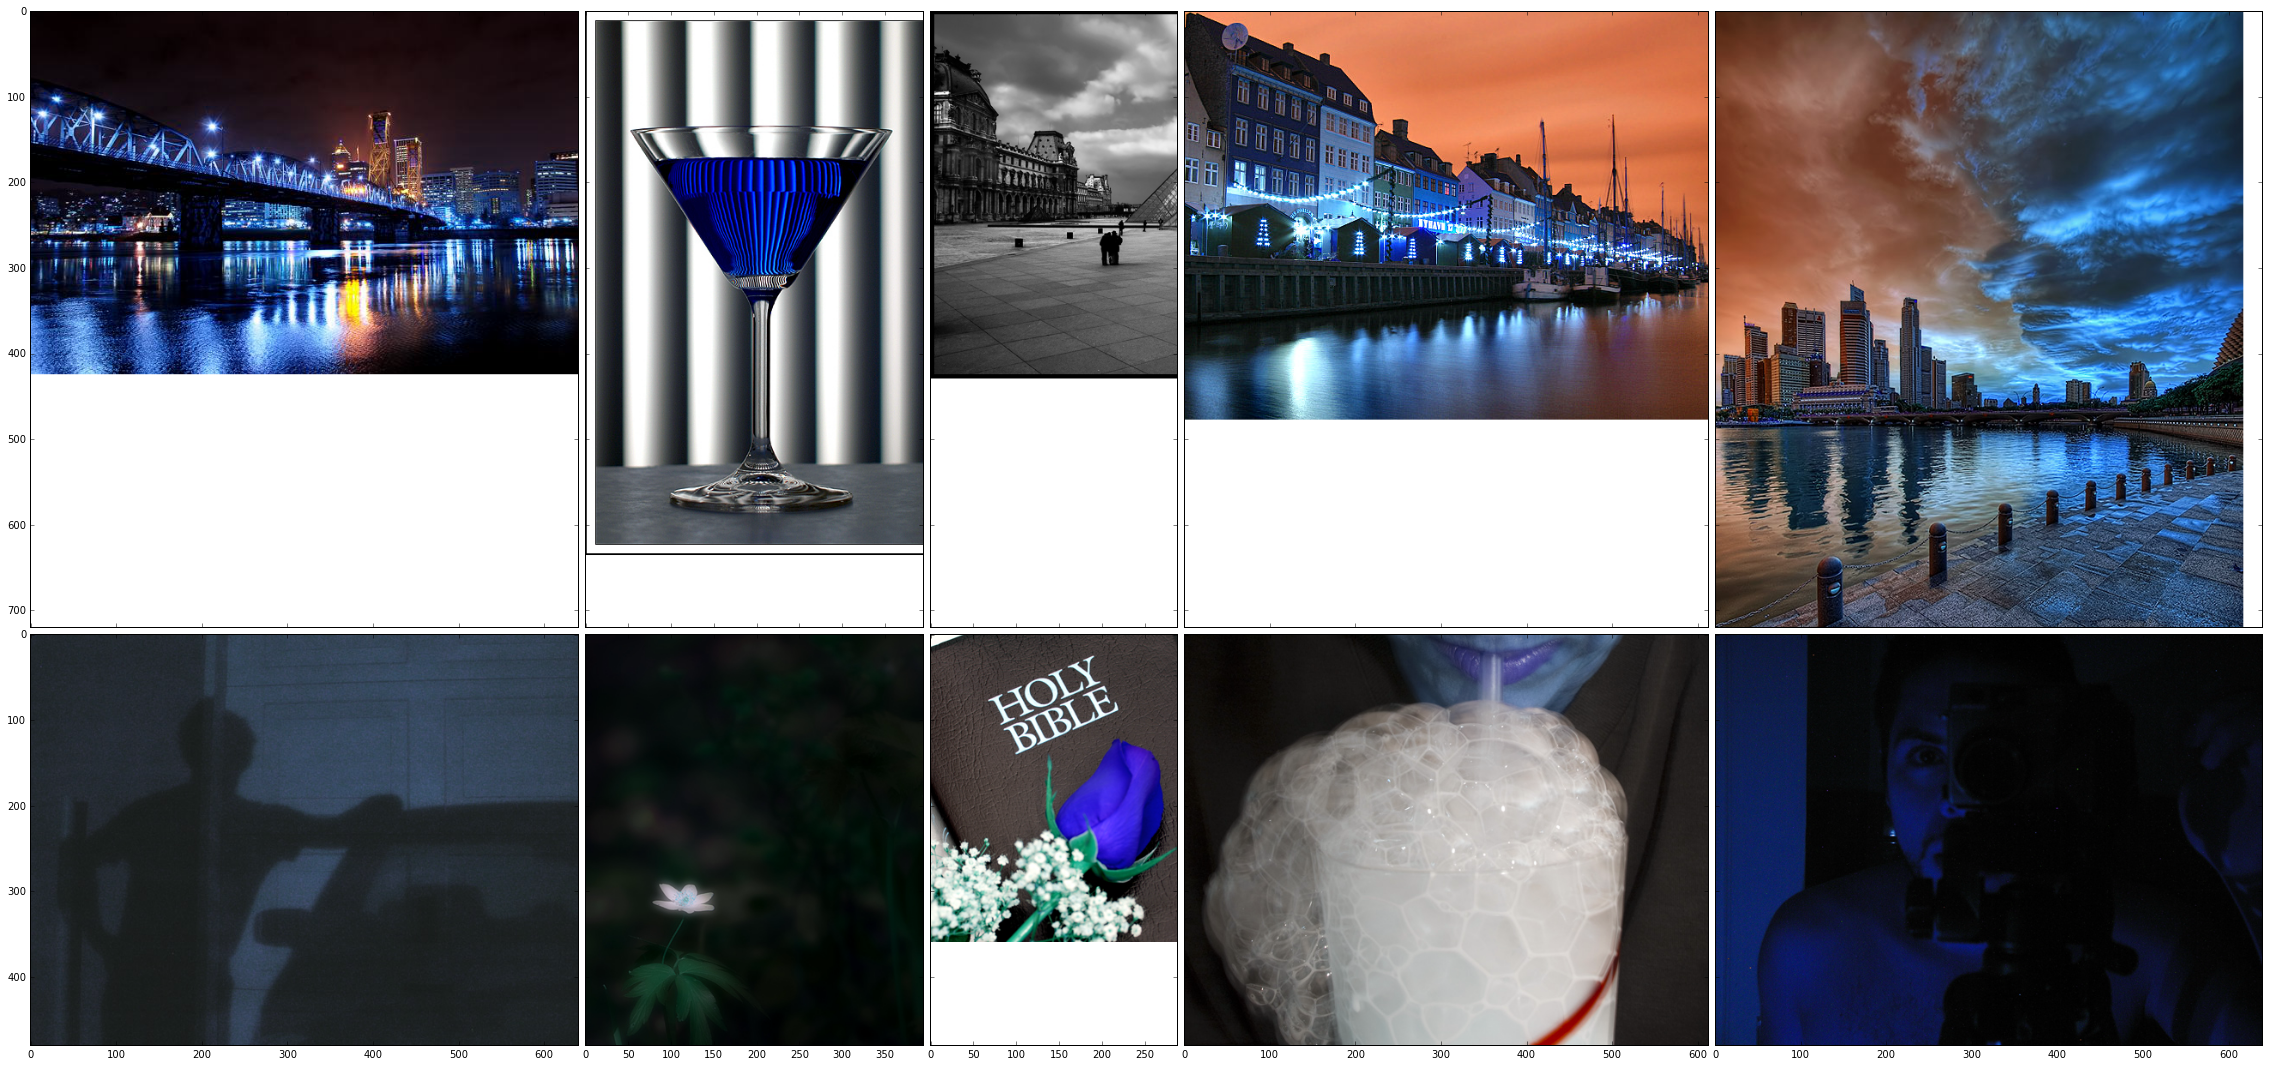

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, (40., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

ava_path = "../dataset/AVA/data/"
ava_data_path = os.path.join(os.getcwd(), ava_path)
i = 0
for index, row in top_vgg_good.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1
for index, row in top_vgg_bad.iterrows():
    filename = "{0}.jpg".format(index)

    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    grid[i].imshow(image)
    i = i + 1

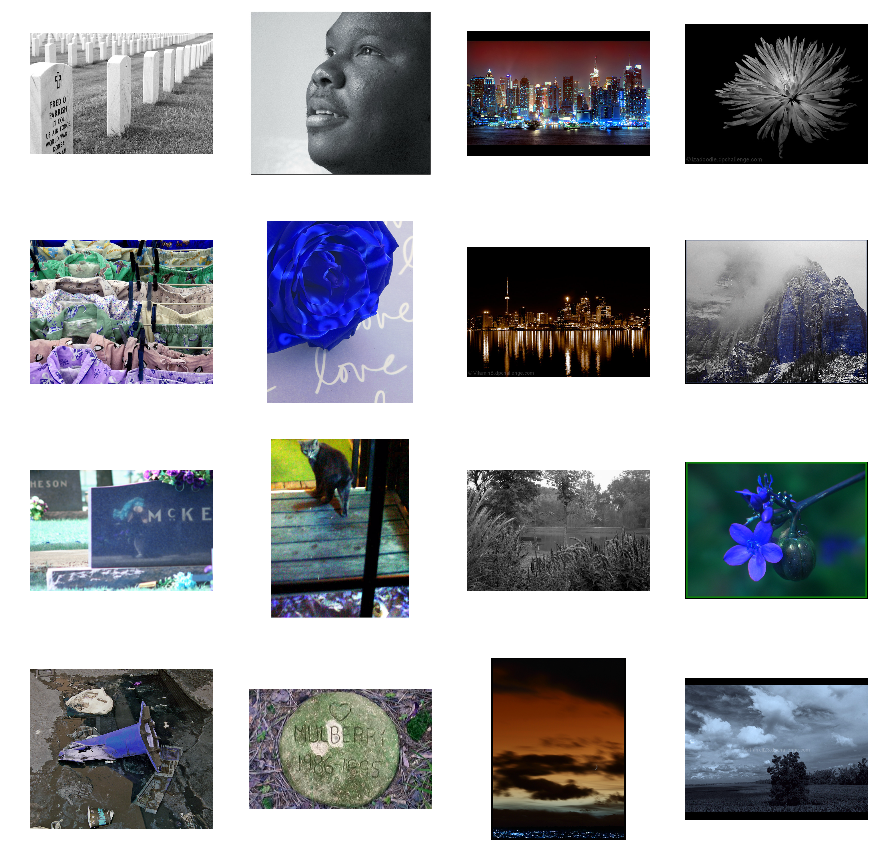

In [33]:
labels_test_cnnsvm = store['full_labels_test_cnnsvm']
top_confidence_good_cnnsvm = labels_test_cnnsvm[(labels_test_cnnsvm.predicted == 1) & (labels_test_cnnsvm.good == 1)].sort_values(by='confidence', ascending=False)[:4]
top_confidence_bad_cnnsvm = labels_test_cnnsvm[(labels_test_cnnsvm.predicted == 0) & (labels_test_cnnsvm.good == 0)].sort_values(by='confidence', ascending=True)[:4]
top_confidence_false_negative_cnnsvm = labels_test_cnnsvm[(labels_test_cnnsvm.predicted == 0) & (labels_test_cnnsvm.good == 1)].sort_values(by='confidence', ascending=False)[:4]
top_confidence_false_positive_cnnsvm = labels_test_cnnsvm[(labels_test_cnnsvm.predicted == 1) & (labels_test_cnnsvm.good == 0)].sort_values(by='confidence', ascending=False)[:4]

joined = top_confidence_false_negative_cnnsvm
joined = joined.append(top_confidence_good_cnnsvm)
joined = joined.append(top_confidence_bad_cnnsvm)
joined = joined.append(top_confidence_false_positive_cnnsvm)
import matplotlib.pyplot as plt
import numpy.random as rnd

fig, ax = plt.subplots(4,4,figsize=(15,15))

list_of_indices = [ [0,0], [0,1], [1,0], [1,1],
                    [0,2], [0,3], [1,2], [1,3],
                    [2,0], [2,1], [3,0],[3,1],
                    [2,2], [2,3], [3,2],[3,3]]
i = 0
for index, row in joined.iterrows():
    filename = "{0}.jpg".format(index)
    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    if(i < len(list_of_indices)):
        curr_index = list_of_indices[i]
        ax[curr_index[0]][curr_index[1]].imshow(image)
        ax[curr_index[0]][curr_index[1]].axis('off')
    i = i + 1
plt.show()

In [17]:
top_good = store['full_labels_test_linear'].sort_values(by='predict_score', ascending=False)[:5]

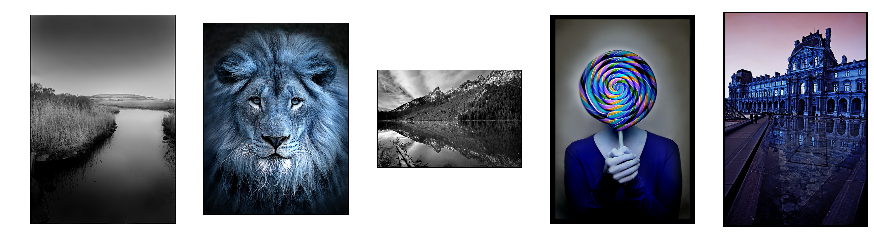

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5, figsize=(15,15))
i=0
for index, row in top_good.iterrows():
    filename = "{0}.jpg".format(index)
    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    ax[i].imshow(image)
    ax[i].axis('off')
    i = i + 1

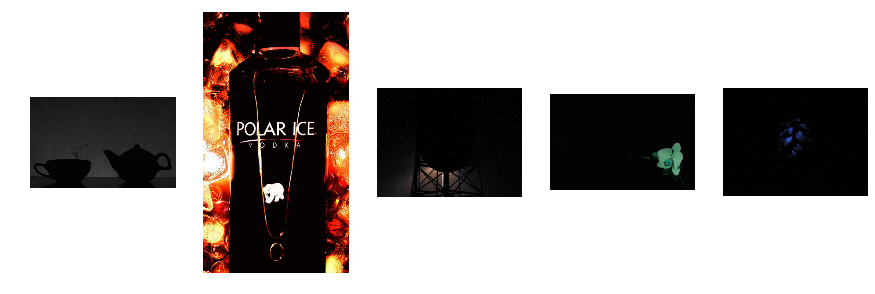

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
top_bad = store['full_labels_test_linear'].sort_values(by='predict_score', ascending=True)[:5]
fig, ax = plt.subplots(1,5, figsize=(15,15))
i=0
for index, row in top_bad.iterrows():
    filename = "{0}.jpg".format(index)
    filepath = os.path.join(ava_data_path, filename)
    image = cv2.imread(filepath)
    ax[i].imshow(image)
    ax[i].axis('off')
    i = i + 1

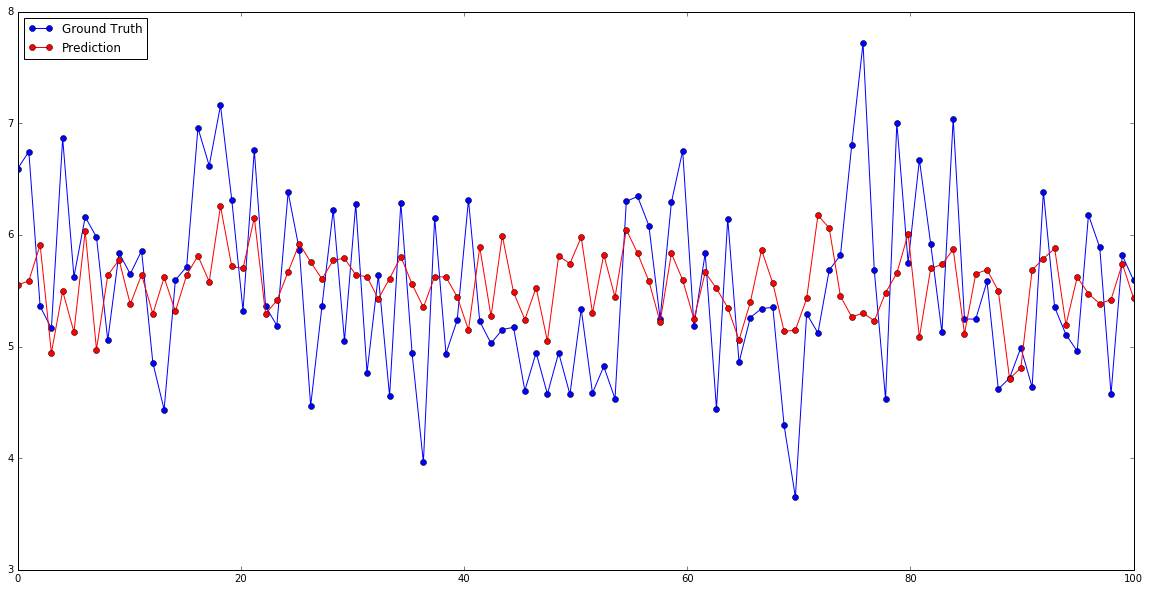

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import numpy as np
import pylab 
x = np.linspace(0, 100, 100)
y1 = store['full_labels_test_linear'].score[:100].as_matrix()
y2 = store['full_labels_test_linear'].predict_score[:100].as_matrix()

pylab.plot(x, y1, '-bo', label='Ground Truth')
pylab.plot(x, y2, '-ro', label='Prediction')
pylab.legend(loc='upper left')
pylab.ylim(3, 8)
pylab.show()

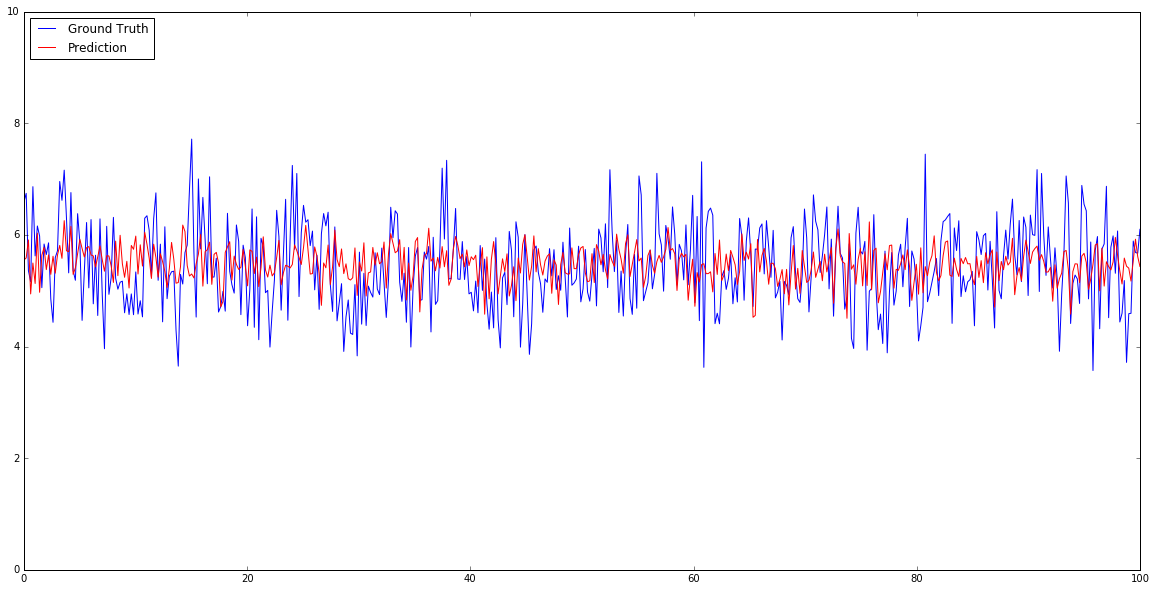

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import numpy as np
import pylab 
x = np.linspace(0, 100, 500)
y1 = store['full_labels_test_linear'].score[:500].as_matrix()
y2 = store['full_labels_test_linear'].predict_score[:500].as_matrix()

pylab.plot(x, y1, '-b', label='Ground Truth')
pylab.plot(x, y2, '-r', label='Prediction')
pylab.legend(loc='upper left')
pylab.ylim(0, 10)
pylab.show()